# Разведочный анализ данных (EDA)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
plt.style.use("bmh")

In [2]:
df = pd.read_csv(r"/content/kicksharing.csv")
df.sample(5)

,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,transport_model,distance_km,created_dttm,book_start_dttm,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt
305823,349990432,910338115,M,20,NaN,NaN,NaN,8.49,50.0,300.0,SL,6.528641,2024-09-28 16:23:41.000000,2024-09-28 16:23:45.858000,2024-09-28 16:33:46.680251,3,2024-09-28 16:23:45.858000,134.90,22.24,NaN
87770,264526832,136836690,F,30,GRD,MAR,Г МОСКВА,6.99,50.0,300.0,SL,1.504677,2024-08-01 18:05:57.000000,2024-08-01 18:06:00.960459,2024-08-01 18:13:32.834399,3,2024-08-01 18:06:00.960459,105.92,37.65,NaN
112639,353406290,909763943,M,22,GRD,MAR,ТВЕРСКАЯ ОБЛ,7.59,35.0,300.0,Max,1.523133,2024-10-11 19:04:37.000000,2024-10-11 19:04:40.959000,2024-10-11 19:15:11.219390,3,2024-10-11 19:04:40.959000,118.49,23.70,NaN
380109,262836535,306813866,M,35,SCH,UNM,Г САНКТ-ПЕТЕРБУРГ,7.49,50.0,300.0,SL,3.366161,2024-07-26 17:28:16.000000,2024-07-26 17:28:19.423085,2024-07-26 17:42:16.391409,3,2024-07-26 17:28:19.423085,154.86,48.01,NaN
107626,351046001,1025419655,M,32,NaN,UNM,СВЕРДЛОВСКАЯ ОБЛ,6.45,30.0,300.0,E,1.138808,2024-10-02 12:47:14.000000,2024-10-02 12:47:21.097000,2024-10-02 12:53:48.062395,5,2024-10-02 14:47:21.097000,75.15,7.52,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396749 entries, 0 to 396748
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   order_rk                 396749 non-null  int64  
 1   party_rk                 396749 non-null  int64  
 2   gender_cd                393828 non-null  object 
 3   age                      396749 non-null  int64  
 4   education_level_cd       190059 non-null  object 
 5   marital_status_cd        217729 non-null  object 
 6   lvn_state_nm             362572 non-null  object 
 7   minute_cost              396749 non-null  float64
 8   activation_cost          396749 non-null  float64
 9   hold_amount              396749 non-null  float64
 10  transport_model          396749 non-null  object 
 11  distance_km              396749 non-null  float64
 12  created_dttm             396749 non-null  object 
 13  book_start_dttm          396749 non-null  object 
 14  book

In [4]:
df.describe()

,order_rk,party_rk,age,minute_cost,activation_cost,hold_amount,distance_km,book_time_zone_cd,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt
count,3.967490e+05,3.967490e+05,396749.000000,396749.000000,396749.000000,396749.000000,396749.000000,396749.000000,396749.000000,366992.000000,21948.000000
mean,2.892236e+08,5.988426e+08,31.544006,7.288688,42.593226,299.983869,3.681031,3.536155,127.647694,37.516121,127.789319
std,3.813458e+07,3.311675e+08,9.434545,1.289492,11.989974,1.939153,141.862349,1.209075,100.122365,75.208560,496.812143
min,2.526112e+08,1.471700e+04,12.000000,1.500000,0.000000,80.000000,0.000000,0.000000,0.000000,-161.940000,1.000000
25%,2.618150e+08,2.962323e+08,24.000000,6.490000,30.000000,300.000000,0.941054,3.000000,80.840000,11.240000,43.000000
50%,2.704367e+08,6.110092e+08,31.000000,7.490000,50.000000,300.000000,1.729883,3.000000,103.940000,18.730000,62.000000
75%,3.432678e+08,8.646921e+08,37.000000,8.220000,50.000000,300.000000,3.063694,3.000000,142.100000,35.060000,81.000000
max,3.562528e+08,1.301075e+09,94.000000,19.990000,50.000000,500.000000,56012.640308,12.000000,5627.640000,3185.000000,55429.360970


In [26]:
null_values = df.isnull().sum()
null_values[null_values != 0]

,0
gender_cd,2921
education_level_cd,206690
marital_status_cd,179020
lvn_state_nm,34177
loyalty_accrual_rub_amt,29757
loyalty_accrual_bns_amt,374801


In [5]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
num_cols= df.select_dtypes(include=['int', 'float']).columns.tolist()

print(f'Количество категориальных признаков: {len(cat_cols)}')
print(f'Количество количественных признаков: {len(num_cols)}')

Количество категориальных признаков: 9
Количество количественных признаков: 11


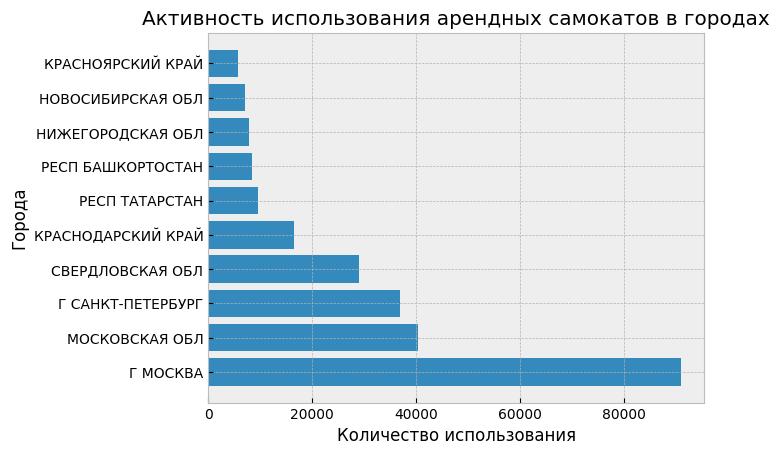

In [24]:
name_of_the_10_most_frequently_encountered_cities = df['lvn_state_nm'].value_counts().iloc[:10].index
cnt_of_the_10_most_frequently_encountered_cities =df['lvn_state_nm'].value_counts().iloc[:10].tolist()


plt.barh(name_of_the_10_most_frequently_encountered_cities,
        cnt_of_the_10_most_frequently_encountered_cities , height=0.8)


plt.title("Активность использования арендных самокатов в городах")
plt.ylabel('Города')
plt.xlabel('Количество использования')
plt.show()


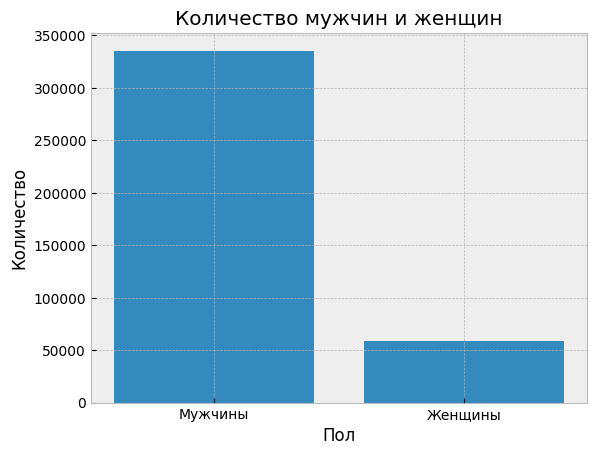

In [28]:
gender = df['gender_cd'].value_counts()
gender.index = ['Мужчины', "Женщины"]

plt.bar(gender.index, gender, width=0.8)

plt.title("Количество мужчин и женщин")
plt.ylabel('Количество')
plt.xlabel('Пол')
plt.show()

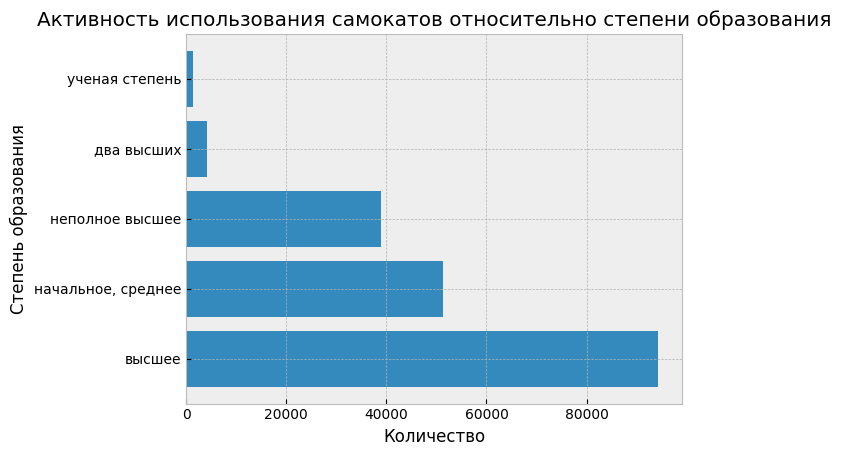

In [33]:
education_lvl = df['education_level_cd'].value_counts()
"""
SCH — начальное, среднее
GRD — высшее
UGR — неполное высшее
PGR — два высших
ACD — ученая степень
"""

education_lvl.index = ['высшее', 'начальное, среднее',
                       'неполное высшее', 'два высших','ученая степень']

plt.barh(education_lvl.index, education_lvl,height=0.8)

plt.title("Активность использования самокатов относительно степени образования")
plt.ylabel('Степень образования')
plt.xlabel('Количество')
plt.show()

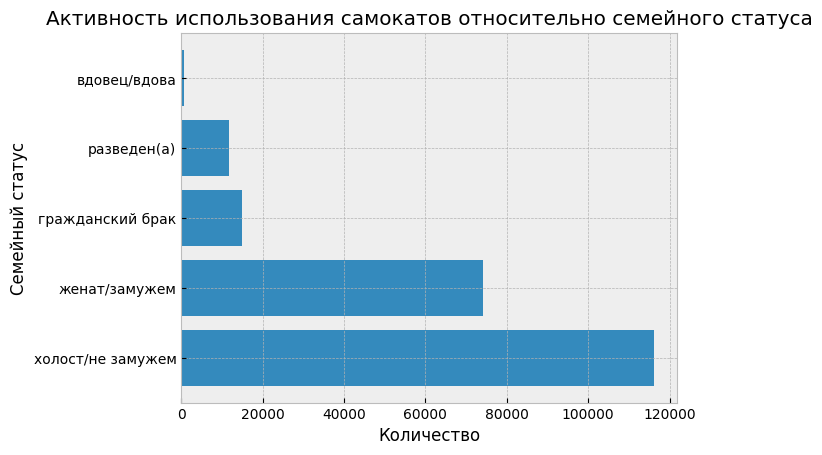

In [38]:
martial_status = df['marital_status_cd'].value_counts()

"""
IMR — состоит в незарегистрированном браке
MAR —женат/замужем
DLW — не проживает с супругом(ой)
OMR — состоит в зарегистрированном браке
CIV — гражданский брак
UNM — холост/не замужем
DIV — разведен(а)
FAL — никогда не состоял(а) в браке
WID — вдовец/вдова
"""

martial_status.index = ["холост/не замужем", 'женат/замужем',
                        'гражданский брак', 'разведен(а)', 'вдовец/вдова']
plt.barh(martial_status.index, martial_status,height=0.8)

plt.title("Активность использования самокатов относительно семейного статуса")
plt.ylabel('Семейный статус')
plt.xlabel('Количество')
plt.show()

In [80]:
age = df['age']

In [71]:
from scipy.stats import gaussian_kde
import numpy as np

def hist_plot_draw(data, title: str = 'Гистограмма', xlab: str = "Х", ylab : str = 'y'):
  """
  Функция строит график распределения data
  """
  fig, ax = plt.subplots(figsize=(10, 6), dpi=100)

  # Построение гистограммы
  n, bins, patches = ax.hist(data, bins=30, density = True, alpha=0.7,
                          color='skyblue', edgecolor='navy',
                          linewidth=1.2, label='Гистограмма')

  # Добавление KDE (оценка плотности ядра)
  kde = gaussian_kde(data)
  x_range = np.linspace(min(data), max(data), 500)
  ax.plot(x_range, kde(x_range), color='crimson', linewidth=2.5,
        label='Плотность распределения')
  plt.title(title)
  plt.xlabel(xlab)
  plt.ylabel(ylab)

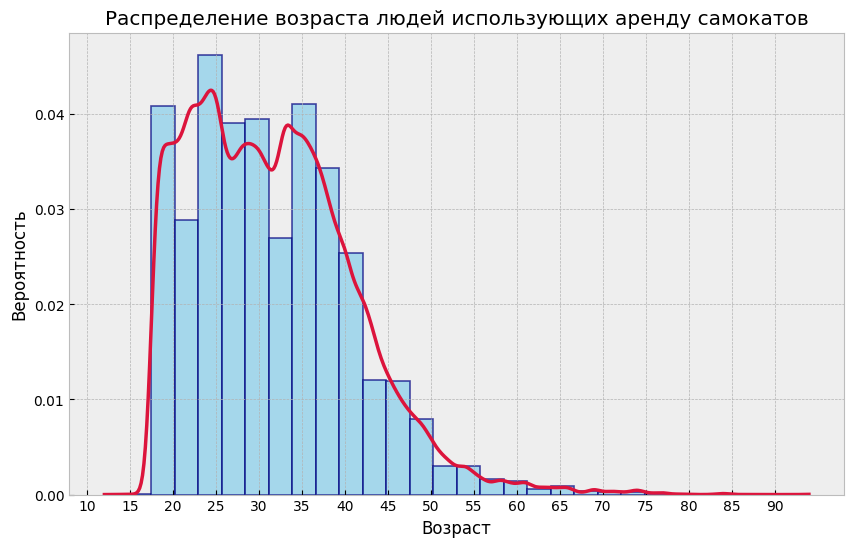

In [75]:
hist_plot_draw(age, title = 'Распределение возраста людей использующих аренду самокатов',
               xlab = "Возраст", ylab = 'Вероятность')
plt.xticks(np.array(range(10,92,5)))
plt.show()

In [83]:
"""
Подростки (12–18 лет)
Молодёжь (19–30 лет)
Зрелая аудитория (31–45 лет)
Опытные потребители (46–60 лет)
Пожилые (60+ лет)
"""
def func(x):

  if x >= 12 and x <= 18: x = "Подростки"
  elif x >= 19 and x <= 30: x = 'Молодежь'
  elif x >= 31 and x <= 45: x = "Зрелая аудитория"
  elif x >= 46 and x <= 60: x = "Опытные потребители"
  elif x >= 61: x = "Пожилые"
  else: x = 'Выброс'
  return x

age = age.apply(func)

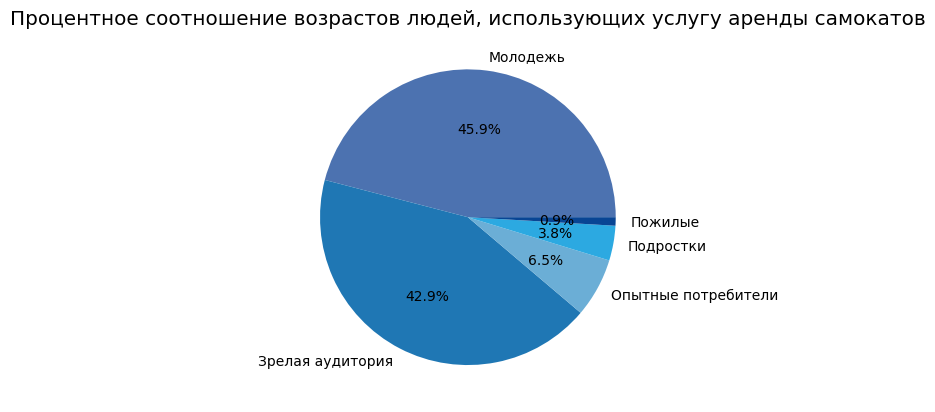

In [92]:
name_of_age = age.value_counts().index
blue_palette = [
    '#4c72b0',  # Насыщенный королевский синий
    '#1f77b4',  # Стандартный синий matplotlib
    '#6baed6',  # Нежный пастельно-синий
    '#2ca9e1',  # Светлый голубовато-синий
    '#084594'   # Темный глубокий синий
]
plt.pie(age.value_counts(),labels=name_of_age,
        colors = blue_palette, autopct='%1.1f%%')
plt.title('Процентное соотношение возрастов людей, использующих услугу аренды самокатов')
plt.show()

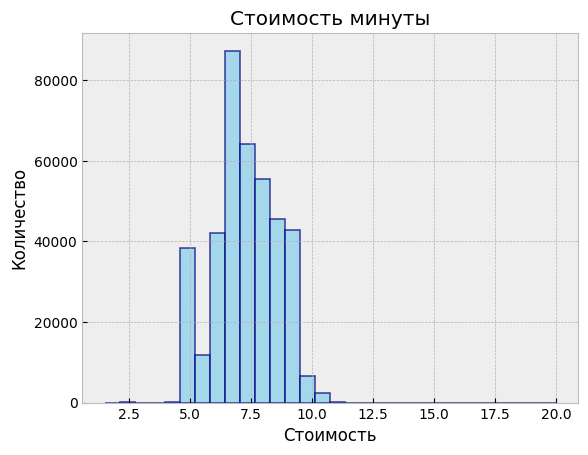

In [99]:
minute_cost = df['minute_cost']
plt.hist(minute_cost, bins=30, alpha=0.7,
                          color='skyblue', edgecolor='navy',
                          linewidth=1.2, label='Гистограмма')
plt.title('Стоимость минуты')
plt.xlabel('Стоимость')
plt.ylabel('Количество')
plt.show()

Text(0.5, 0, 'Регион')

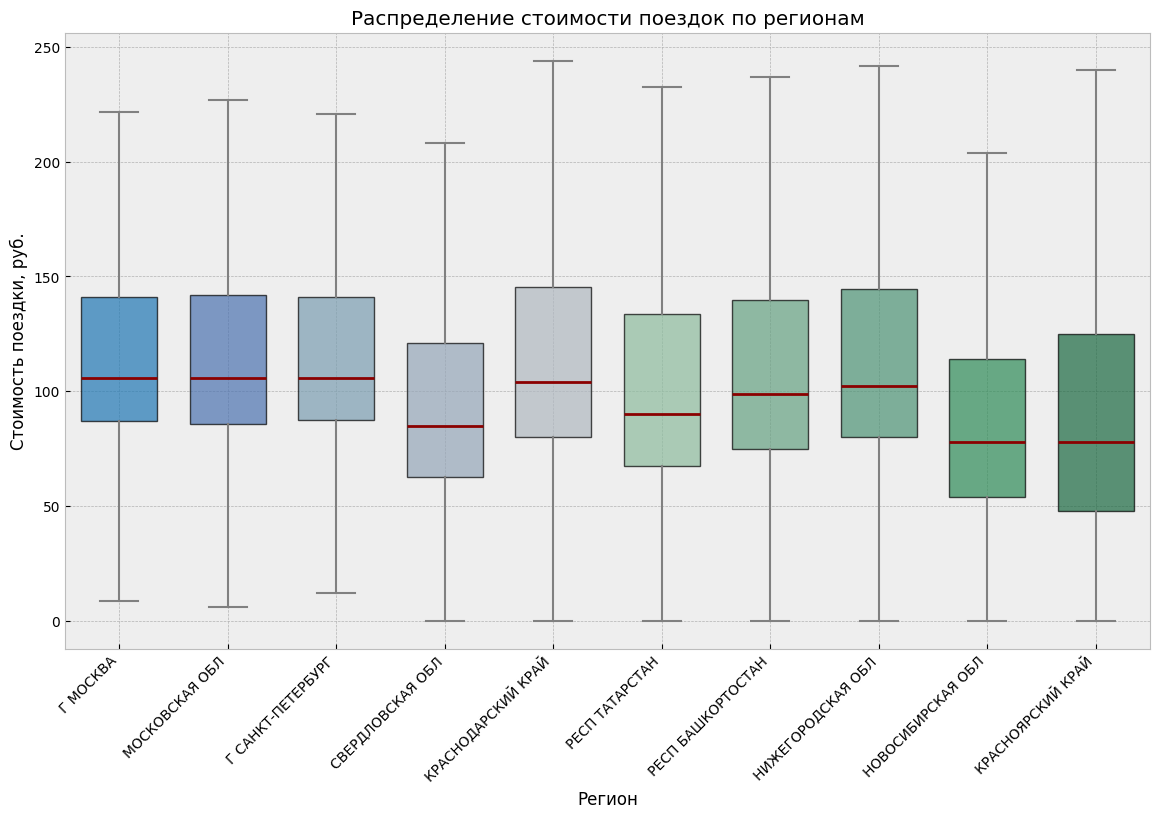

In [114]:

fig, ax = plt.subplots(figsize=(14, 8))


data = [df[df['lvn_state_nm'] == name]['nominal_price_rub_amt'].values
        for name in name_of_the_10_most_frequently_encountered_cities]

boxplot = ax.boxplot(data,
                     patch_artist=True,
                     showfliers=False,  # Скрываем выбросы для лучшей читаемости
                     widths=0.7)

colors =  [
    '#1f77b4',  # насыщенный синий
    '#4c72b0',  # глубокий сине-серый
    '#7b9eb1',  # серо-голубой
    '#95a6b8',  # светло-серый с синим оттенком
    '#b0b8c0',  # нейтральный серый
    '#8dbc9e',  # серо-зеленый
    '#66a182',  # приглушенный зеленый
    '#4d9375',  # оливково-зеленый
    '#2e8b57',  # морской волны
    '#1a6840'   # глубокий темно-зеленый
]

for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

for element in ['whiskers', 'caps', 'medians']:
    plt.setp(boxplot[element], color='gray', linewidth=1.5)

plt.setp(boxplot['medians'], color='darkred', linewidth=2)

ax.set_xticklabels(name_of_the_10_most_frequently_encountered_cities,
                  rotation=45,
                  ha='right',
                  fontsize=10)

ax.set_title('Распределение стоимости поездок по регионам')

ax.set_ylabel('Стоимость поездки, руб.', fontsize=12)
ax.set_xlabel('Регион', fontsize=12)


In [121]:
mean_of_nominal_price_rub_amt_by_reg = [df[df['lvn_state_nm'] == name]['nominal_price_rub_amt'].mean()
        for name in name_of_the_10_most_frequently_encountered_cities]
median_of_nominal_price_rub_amt_by_reg = [df[df['lvn_state_nm'] == name]['nominal_price_rub_amt'].median()
        for name in name_of_the_10_most_frequently_encountered_cities]

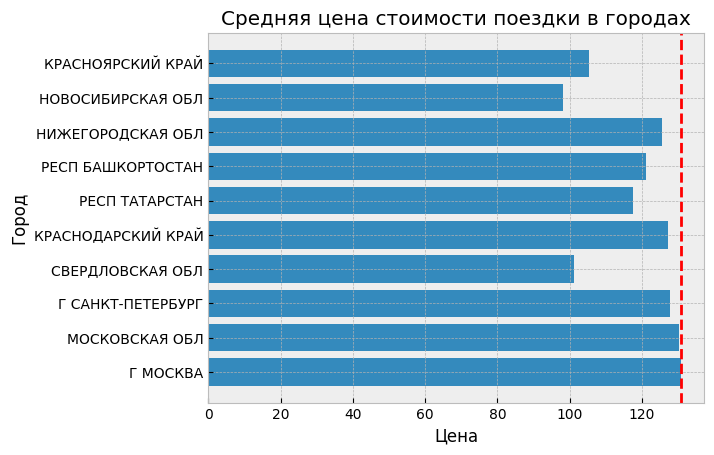

In [136]:
plt.barh(name_of_the_10_most_frequently_encountered_cities,mean_of_nominal_price_rub_amt_by_reg)
plt.title('Средняя цена стоимости поездки в городах')
plt.axvline(max(mean_of_nominal_price_rub_amt_by_reg),color = 'r', ls='--')
plt.xlabel('Цена')
plt.ylabel('Город')
plt.show()

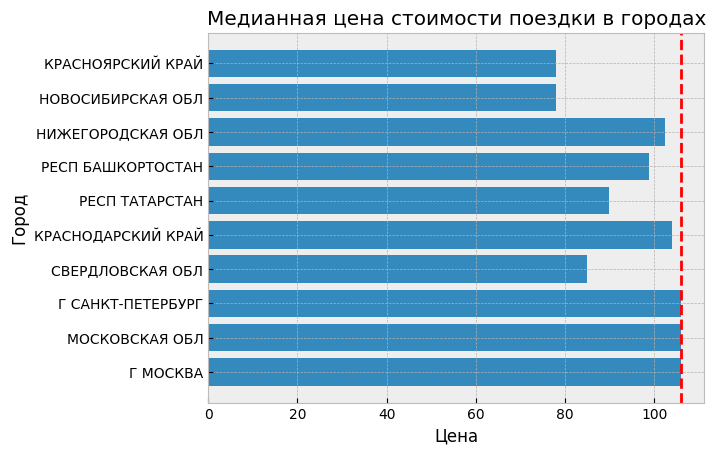

In [135]:
plt.barh(name_of_the_10_most_frequently_encountered_cities,median_of_nominal_price_rub_amt_by_reg)
plt.title('Медианная цена стоимости поездки в городах')
plt.axvline(max(median_of_nominal_price_rub_amt_by_reg),color = 'r', ls='--')
plt.xlabel('Цена')
plt.ylabel('Город')
plt.show()

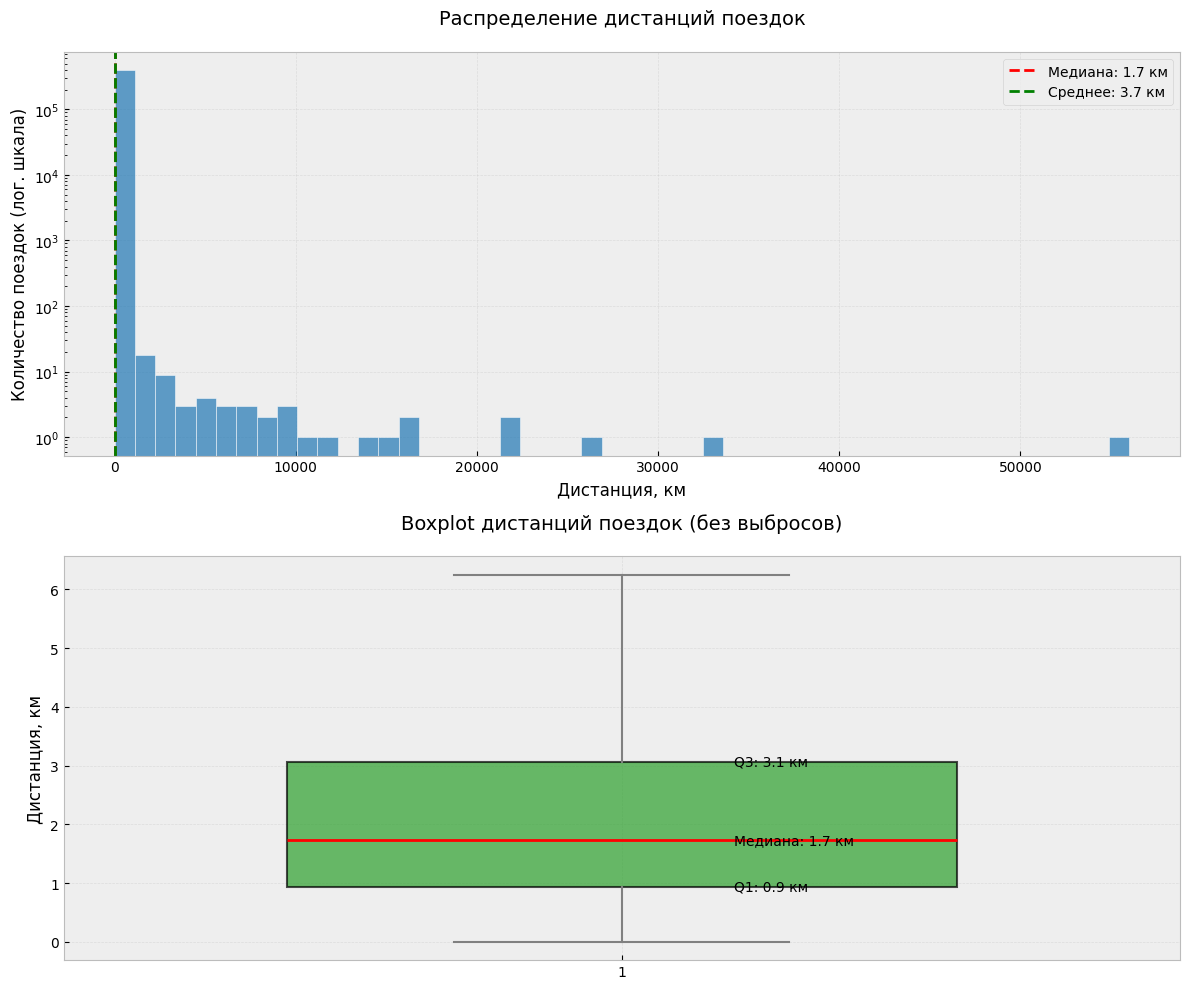

In [157]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))


n, bins, patches = ax1.hist(df['distance_km'].dropna(), bins=50,
                           color='#1f77b4', alpha=0.7,
                           edgecolor='white', linewidth=0.5,
                           log=True)  # Логарифмическая шкала по Y

ax1.set_xlabel('Дистанция, км', fontsize=12)
ax1.set_ylabel('Количество поездок (лог. шкала)', fontsize=12)
ax1.set_title('Распределение дистанций поездок', fontsize=14, pad=20)
ax1.grid(True, alpha=0.3, linestyle='--')
ax1.set_axisbelow(True)

median_km = df['distance_km'].median()
mean_km = df['distance_km'].mean()
ax1.axvline(median_km, color='red', linestyle='--', linewidth=2,
           label=f'Медиана: {median_km:.1f} км')
ax1.axvline(mean_km, color='green', linestyle='--', linewidth=2,
           label=f'Среднее: {mean_km:.1f} км')
ax1.legend()

boxplot = ax2.boxplot(df['distance_km'].dropna(),
                     showfliers=False,  # Не показываеv выбросы
                     patch_artist=True,
                     widths=0.6,
                     vert=True)

for box in boxplot['boxes']:
    box.set(facecolor='#2ca02c', alpha=0.7, linewidth=1.5)

for whisker in boxplot['whiskers']:
    whisker.set(color='gray', linewidth=1.5, linestyle='-')

for cap in boxplot['caps']:
    cap.set(color='gray', linewidth=1.5)

for median in boxplot['medians']:
    median.set(color='red', linewidth=2)

ax2.set_ylabel('Дистанция, км', fontsize=12)
ax2.set_title('Boxplot дистанций поездок (без выбросов)', fontsize=14, pad=20)
ax2.grid(True, alpha=0.3, linestyle='--')
ax2.set_axisbelow(True)


stats = df['distance_km'].describe()
q25, q75 = stats['25%'], stats['75%']
ax2.text(1.1, q25, f'Q1: {q25:.1f} км', va='center', fontsize=10)
ax2.text(1.1, median_km, f'Медиана: {median_km:.1f} км', va='center', fontsize=10)
ax2.text(1.1, q75, f'Q3: {q75:.1f} км', va='center', fontsize=10)

plt.tight_layout()
plt.show()